Trabalho Prático 3 - Introdução à Computação Visual

Alison de Oliveira Souza - 2012049316

O trabalho 3 foi realizado utilizando o trabalho 1 como base. Por esse motivo, copiei meu trabalho 1 e apenas inseri uma célula para calcular a quantidade de letras em cada retângulo, que é a tarefa do trabalho 3.

PS: Para realizar o TP1, utilizei a função cv2.dilate. Como na especificação diz que não haverá penalidades na nota do TP3 por causa do TP1, resolvi manter essa parte usando a cv2.dilate.

# Lendo imagem inicial

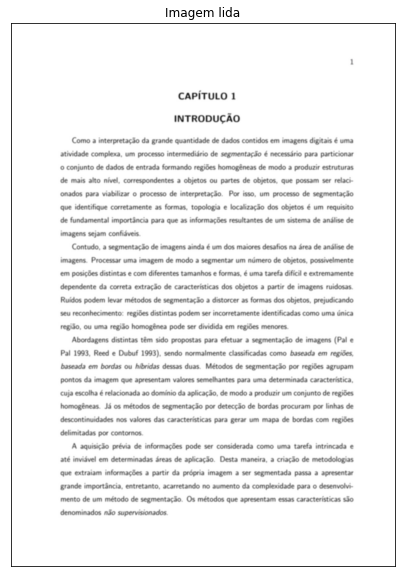

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# print cv2.__version__
# USEI OPENCV VERSÂO 3.1.0

# A imagem escolhida deve estar no mesmo diretório do notebook.
# Para escolher outra imagem, basta alterar o nome da imagem aqui:
image_name = 'page1.jpg'
# Lendo imagem sem alterações.
img = cv2.imread(image_name, -1)

# cv2.imshow('image',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure(figsize=(10,10))
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.title('Imagem lida'), plt.xticks([]), plt.yticks([])
plt.show()

# Limiarizando a imagem

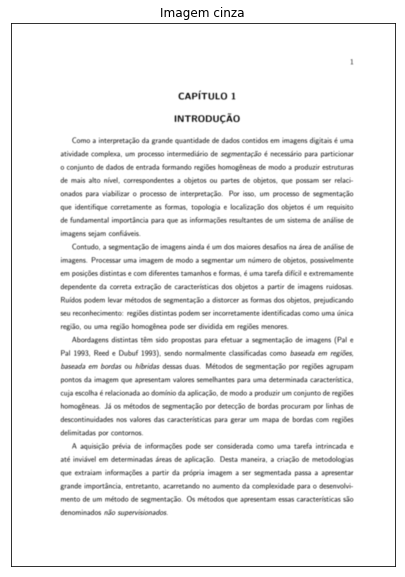

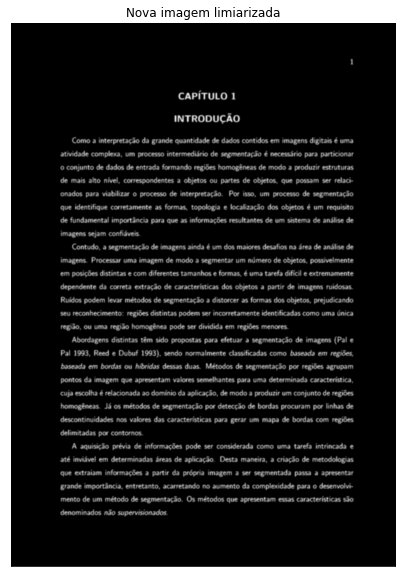

In [49]:
# Transformando imagem em escala de cinza.
# Necessário para a limiarização (primeiro argumento deve ser em escala de cinza).
img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Limiarização.
# Para textos em preto, usar cv.THRESH_BINARY_INV.
ret, limiarized = cv2.threshold(img2gray, 180, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(10,10))
plt.imshow(img2gray, cmap = 'gray', interpolation = 'bicubic')
plt.title('Imagem cinza'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(limiarized, cmap = 'gray', interpolation = 'bicubic')
plt.title('Nova imagem limiarizada'), plt.xticks([]), plt.yticks([])
plt.show()

# Dilatando palavras para facilitar identificação de contornos

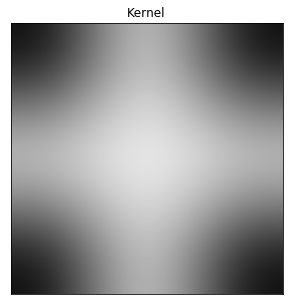

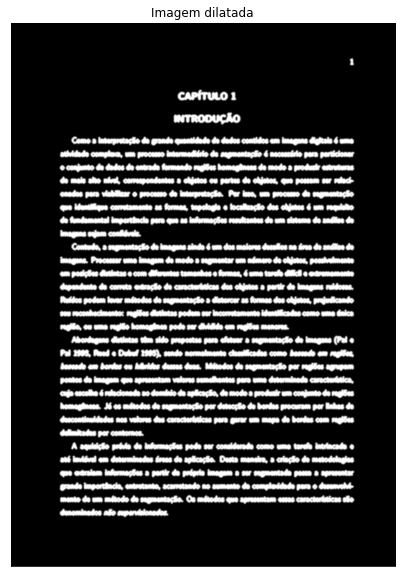

In [50]:
# Janela (matriz de números) necessária na dilatação.
# Formato de cruz (vizinhança-4) deu melhores resultados.
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Dilatação ajuda a eliminar espaços entre as letras.
# Quanto mais iterações, mais dilatada é a imagem.
# Devemos tomar cuidado para não dilatar demais e eliminar os espaços entre palavras.
dilated = cv2.dilate(limiarized, kernel, iterations=4)

plt.figure(figsize=(5,5))
plt.imshow(kernel, cmap = 'gray', interpolation = 'bicubic')
plt.title('Kernel'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(dilated, cmap = 'gray', interpolation = 'bicubic')
plt.title('Imagem dilatada'), plt.xticks([]), plt.yticks([])
plt.show()

# Identificando os contornos

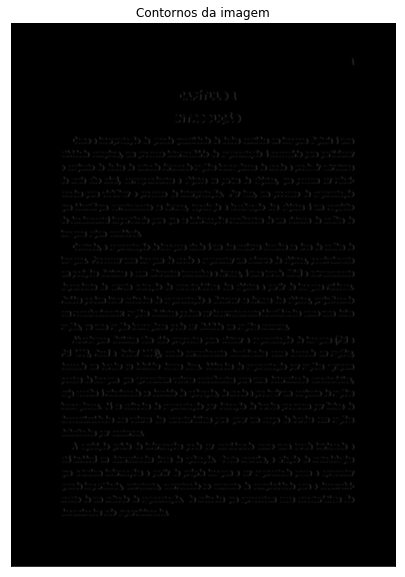

In [51]:
# cv2.findContours retorna a imagem com os contornos (image), uma lista de contornos (contours),
# e também retorna a hierarquia (hierarchy).
image_contours, contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

plt.figure(figsize=(10,10))
plt.imshow(image_contours, cmap = 'gray', interpolation = 'bicubic')
plt.title('Contornos da imagem'), plt.xticks([]), plt.yticks([])
plt.show()

# TP3

Nesta célula está definida a função que calcula a quantidade de letras em cada retângulo.
Basicamente, o trabalho prático 3 está aqui.

In [52]:
# Função que conta quantos contornos de letras existem, limitados a uma região.
def contaLetras(x, y, w, h):
    contador = 0
    img_cont, letter_contours, hierarchy2 = cv2.findContours(limiarized,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    
    for letter in letter_contours:
        [a, b, c, d] = cv2.boundingRect(letter)
        if a >= x and (a + c) <= (x + w) and b >= y and (b + d) <= (y + h):
            contador += 1
            
    return contador

# Desenhando os retângulos na imagem de saída, escrevendo imagem, e salvando as coordenadas de cada retângulo no arquivo output.txt

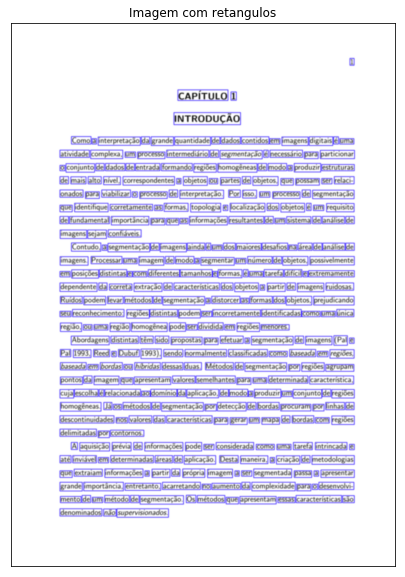

In [54]:
# Abrindo arquivo de texto onde será salvo as coordenadas de cada retângulo.
file = open("output.txt", "w")

for contour in contours:
    # boundingRect encontra um retângulo que delimita o contorno.
    # Retorna as coordenadas do canto superior esquerdo (x, y),
    # e a largura (w) e altura (h) do retângulo.
    [x, y, w, h] = cv2.boundingRect(contour)

    # Desenha o retângulo encontrado pela boundingRect na imagem original (img).
    # O segundo e terceiro argumentos são dois cantos opostos do retângulo (sup esquerdo e inf direito respectivamente).
    # O quarto argumento é a cor do retângulo. Tentei deixar vermelho :)
    # O quinto argumento é a largura da linha do retângulo.
    cv2.rectangle(img, (x, y), (x + w, y + h), (25, 0, 255), 2)
    
    ###### TP3 ######
    # Conta a quantidade de letras dentro de cada retêngulo.
    n = contaLetras(x, y, w, h)

    # Escreve no arquivo output.txt as coordenadas de cada retângulo e o número de letras.
    file.write(str(x) + " " + str(y) + " " + str(w) + " " + str(h) + " " + str(n) + "\n")

# Fecha o arquivo output.txt.
file.close()

# Salva a imagem com os retângulos em uma nova imagem.
# O nome dessa imagem será new_ + nome_anterior.
# Ex: se a imagem original tem nome image, a nova imagem terá o nome new_image.
s = 'new_' + image_name
cv2.imwrite(s, img)

plt.figure(figsize=(10,10))
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.title('Imagem com retangulos'), plt.xticks([]), plt.yticks([])
plt.show()